In [1]:
import pandas as pd
import matplotlib as plt
import re

cache_sizes = [2*1024, 4 * 1024, 8 * 1024, 16 * 1024]

%matplotlib inline

In [5]:
def read_stats(stat):
    values = []
    
    for size in cache_sizes:
        with open(f"/home/nivetha/5SIA0-ECA-Assignments/eeg/1.3/{size}/stats.txt") as f:
            line = f.readline()
            while line:
                line = re.sub(r"\s+#.*$", "", line)
                if re.match(stat, line):
                    value = float(re.split(r"\s+", line)[1])
                    values.append(value)
                line = f.readline()
                
    return pd.Series(list(values), name=stat)

   cache_size  miss_rate        hits  total_accesses
0        2048   0.247494  20852419.0      27710618.0
1        4096   0.175336  22832292.0      27686773.0
2        8192   0.122030  24626232.0      28049052.0
3       16384   0.073185  25964703.0      28014990.0


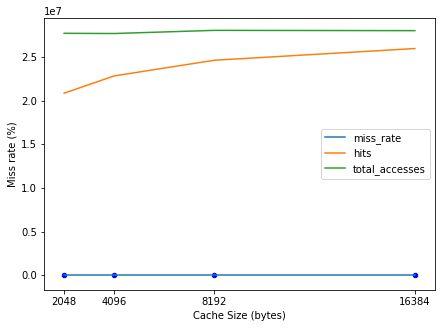

In [7]:
# Cache size vs cache miss rate
cache_sizes_series = pd.Series(cache_sizes, name='cache_size')
overall_miss_rate = read_stats("system.l2.overall_miss_rate::total").rename("miss_rate")
overall_hits = read_stats("system.l2.overall_hits::total").rename("hits")
overall_memory_accesses = read_stats("system.l2.overall_accesses::total").rename("total_accesses")

df = pd.concat([cache_sizes_series, overall_miss_rate, overall_hits, overall_memory_accesses], axis=1)

# df.miss_rate = df.miss_rate.apply(lambda x: x * 100)
# df.icache_miss_rate = df.icache_miss_rate.apply(lambda x: x * 100)

ax = df.plot(kind='line', x='cache_size', figsize=(7, 5))

df.plot(kind='scatter', x='cache_size', y='miss_rate', c='blue', ax=ax)

ax.set_xlabel('Cache Size (bytes)')
ax.set_ylabel('Miss rate (%)')
ax.set_xticks(df.cache_size)

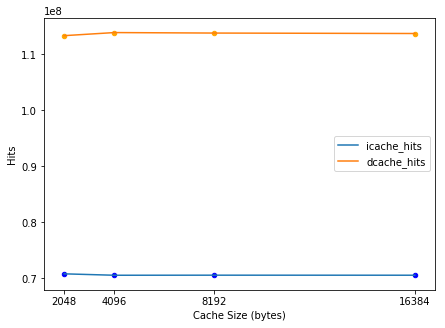

In [41]:
# Cache size vs hits
cache_sizes_series = pd.Series(cache_sizes, name='cache_size')
icache_overall_hits = read_stats("system.cpu.icache.overall_hits::total").rename("icache_hits")
dcache_overall_hits = read_stats("system.cpu.dcache.overall_hits::total").rename("dcache_hits")

df = pd.concat([cache_sizes_series, icache_overall_hits, dcache_overall_hits], axis=1)

ax = df.plot(kind='line', x='cache_size', figsize=(7, 5))
df.plot(kind='scatter', x='cache_size', y='icache_hits', c='blue', ax=ax)
df.plot(kind='scatter', x='cache_size', y='dcache_hits', c='orange', ax=ax)

ax.set_xlabel('Cache Size (bytes)')
ax.set_ylabel('Hits')
ax.set_xticks(df.cache_size)

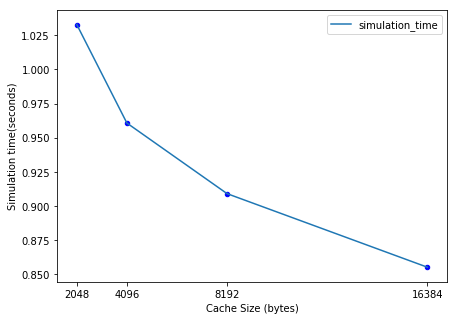

In [42]:
# Cache size vs simulation seconds
cache_sizes_series = pd.Series(cache_sizes, name='cache_size')
simulation_time = read_stats("sim_seconds").rename("simulation_time")
# dcache_overall_hits = read_stats("system.cpu.dcache.overall_hits::total").rename("dcache_hits")

df = pd.concat([cache_sizes_series, simulation_time], axis=1)

ax = df.plot(kind='line', x='cache_size', figsize=(7, 5))
df.plot(kind='scatter', x='cache_size', y='simulation_time', c='blue', ax=ax)


ax.set_xlabel('Cache Size (bytes)')
ax.set_ylabel('Simulation time(seconds)')
ax.set_xticks(df.cache_size)